In [1]:
# https://youtu.be/YEBfamv-_do
# https://youtu.be/wXB-V_Keiu8

# https://www.wikiwand.com/en/RSA_(cryptosystem)
# https://bigideascryptok12.bitbucket.io/
# https://math.stackexchange.com/questions/20157/rsa-in-plain-english
# http://web.math.unifi.it/users/piochi/MATERIALI_OL/aritfinite-crittograf/crittologia.htm


In [93]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$$\left[r\right]_m = \left\{n\in\mathbb{Z} \mid n = k\cdot m + r \text{ per } k \in\mathbb{Z}\right\}$$

$$\left[3\right]_7 = \left\{\ldots, -18, -11, -4, 3, 10, 17, 24, 31, \ldots\right\}$$

$$\left[0\right]_7 = \left\{\ldots, -21, -14, -7, 0, 7, 14, \ldots\right\}$$

$$\left[r\right] + \left[s\right] = \left[r + s\right]$$

$$\left[r\right] \cdot \left[s\right] = \left[r \cdot s\right]$$

$$\left[r\right]^e = \left[r^e\right]$$

In [90]:
from ml import *
import matplotlib.pyplot as plt
from time import thread_time_ns

In [4]:
f = [
 7,
 83,
 929,
 6089,
 58543,
 158527,
 1508711,
 10507951,
 105072001,
 1050702811
]
tempi_moltiplica = []
tempi_fattorizza = []
for i in range(len(f)):
  t0 = thread_time_ns()
  m = moltiplica(f[:i + 1])
  t1 = thread_time_ns()
  tempi_moltiplica.append((t1 - t0) / 10 ** 9)
  fattorizza(m)
  t2 = thread_time_ns()
  tempi_fattorizza.append((t2 - t1) / 10 ** 9)

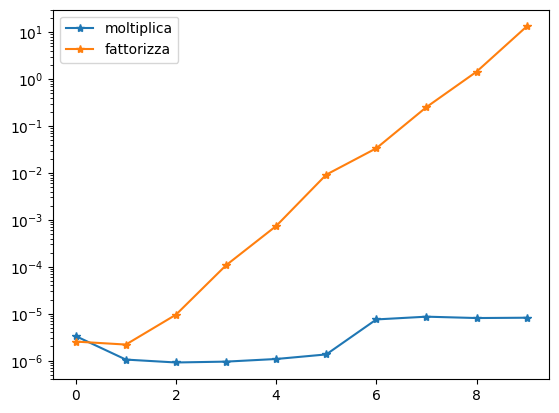

In [7]:
plt.plot(tempi_moltiplica, '*-', label = 'moltiplica')
plt.plot(tempi_fattorizza, '*-', label = 'fattorizza')
plt.yscale('log')
plt.legend()

In [8]:
fattori = fattorizza(1237127471556713841512578)
fattori

[2, 153467071, 4030595825852159]

In [9]:
moltiplica(fattori)

1237127471556713841512578

In [10]:
M = Mod(8)
M.prodotto()

┌─────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ *   │ [1]   │ [2]   │ [3]   │ [4]   │ [5]   │ [6]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [1] │ [1]   │ [2]   │ [3]   │ [4]   │ [5]   │ [6]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [2] │ [2]   │ [4]   │ [6]   │ [0]   │ [2]   │ [4]   │ [6]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [3] │ [3]   │ [6]   │ [1]   │ [4]   │ [7]   │ [2]   │ [5]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [4] │ [4]   │ [0]   │ [4]   │ [0]   │ [4]   │ [0]   │ [4]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [5] │ [5]   │ [2]   │ [7]   │ [4]   │ [1]   │ [6]   │ [3]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [6] │ [6]   │ [4]   │ [2]   │ [0]   │ [6]   │ [4]   │ [2]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [7] │ [7]   │ [6]   │ [5]   │ [4]   │ 

In [11]:
Mod(8).prodotto_coprimi()

┌─────┬───────┬───────┬───────┬───────┐
│ *   │ [1]   │ [3]   │ [5]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┤
│ [1] │ [1]   │ [3]   │ [5]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┤
│ [3] │ [3]   │ [1]   │ [7]   │ [5]   │
├─────┼───────┼───────┼───────┼───────┤
│ [5] │ [5]   │ [7]   │ [1]   │ [3]   │
├─────┼───────┼───────┼───────┼───────┤
│ [7] │ [7]   │ [5]   │ [3]   │ [1]   │
└─────┴───────┴───────┴───────┴───────┘


In [12]:
Mod(14).generatori()

┌──────┬──────┬──────┬──────┬──────┬─────┬─────┐
│ **   │ 1    │ 2    │ 3    │ 4    │ 5   │ 6   │
├──────┼──────┼──────┼──────┼──────┼─────┼─────┤
│ [1]  │ [1]  │      │      │      │     │     │
├──────┼──────┼──────┼──────┼──────┼─────┼─────┤
│ [3]  │ [3]  │ [9]  │ [13] │ [11] │ [5] │ [1] │
├──────┼──────┼──────┼──────┼──────┼─────┼─────┤
│ [5]  │ [5]  │ [11] │ [13] │ [9]  │ [3] │ [1] │
├──────┼──────┼──────┼──────┼──────┼─────┼─────┤
│ [9]  │ [9]  │ [11] │ [1]  │      │     │     │
├──────┼──────┼──────┼──────┼──────┼─────┼─────┤
│ [11] │ [11] │ [9]  │ [1]  │      │     │     │
├──────┼──────┼──────┼──────┼──────┼─────┼─────┤
│ [13] │ [13] │ [1]  │      │      │     │     │
└──────┴──────┴──────┴──────┴──────┴─────┴─────┘


In [13]:
def summ(msg, key):
  key = key * (len(msg) // len(key) + 1)
  return ''.join([s(a, b) for a, b in zip(msg, key)])

def s(a, b):
  if not (a.isalpha() and a.isascii()): return a
  return chr((ord(a) - ord('a') + ord(b) - ord('a')) % 26 + ord('a'))

def inv(key):
  return ''.join(chr((ord('a') - ord(a)) % 26 + ord('a')) for a in key)

summ(summ('ciao mamma', 'mamma'), inv('mamma'))

'ciao mamma'

In [16]:
from urllib.request import urlopen
from collections import Counter

with urlopen('https://www.gutenberg.org/cache/epub/45334/pg45334.txt') as inf:
  text = inf.read().decode('utf-8-sig')

[112, 101, 114, 104, 99, 232]

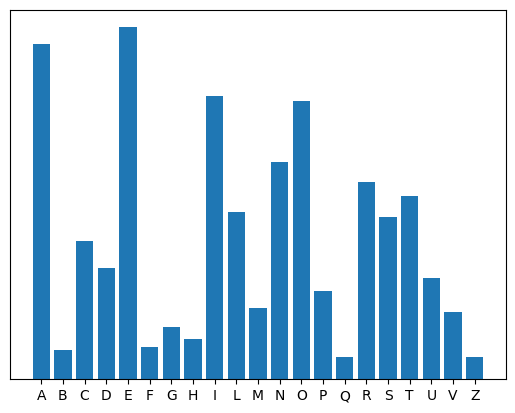

In [146]:
istogramma_lettere(text)

In [158]:
def cesar(msg, k):
  A = ord('A')
  return ''.join(chr(A + (ord(c) - A + k) % 26) if c.isalpha() and c.isascii() else c for c in msg.upper())

In [171]:
msg = """
Tutt'e due si volsero a chi ne sapeva piu' di loro, e da cui 
aspettavano uno schiarimento, il quale non poteva essere che 
doloroso: tutt'e due, lasciando travedere, in mezzo al dolore, 
e con l'amore diverso che ognun d'essi portava a Lucia.
"""

In [172]:
c = cesar(msg, 5)
print(c)


YZYY'J IZJ XN ATQXJWT F HMN SJ XFUJAF UNZ' IN QTWT, J IF HZN 
FXUJYYFAFST ZST XHMNFWNRJSYT, NQ VZFQJ STS UTYJAF JXXJWJ HMJ 
ITQTWTXT: YZYY'J IZJ, QFXHNFSIT YWFAJIJWJ, NS RJEET FQ ITQTWJ, 
J HTS Q'FRTWJ INAJWXT HMJ TLSZS I'JXXN UTWYFAF F QZHNF.



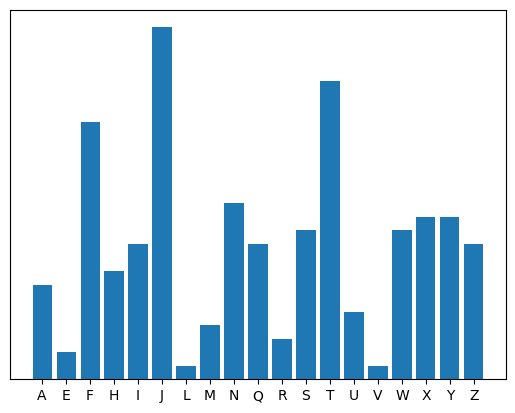

In [173]:
istogramma_lettere(c)

In [174]:
print(cesar(c, 21))


TUTT'E DUE SI VOLSERO A CHI NE SAPEVA PIU' DI LORO, E DA CUI 
ASPETTAVANO UNO SCHIARIMENTO, IL QUALE NON POTEVA ESSERE CHE 
DOLOROSO: TUTT'E DUE, LASCIANDO TRAVEDERE, IN MEZZO AL DOLORE, 
E CON L'AMORE DIVERSO CHE OGNUN D'ESSI PORTAVA A LUCIA.



In [175]:
from time import thread_time_ns

In [29]:
N = list(range(1, 1000))
p = ['r' if è_primo(n) else 'b' for n in N]

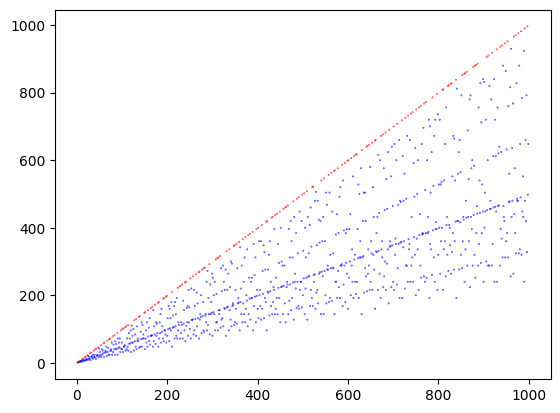

In [30]:
plt.scatter(N, [φ(n) for n in N], s = .1, color = p)

In [31]:
p, g = 2963, 51

M = Mod(p)
len(M[g].potenze()) == p - 1

True

In [32]:
# Diffie-Hellman

a, b = 123, 345
print(M[g] ** a, M[g] ** b)
M[2149] ** b == M[2940] ** a

[2149] [2940]


True

In [33]:
p, q = 55202166624234742076825422018198552545568721350927, 43045972142075202331028535612422134545369845034403
e = 65537

In [34]:
n = p * q
t = (p - 1) * (q - 1)

In [35]:
d = (1 / Mod(t)[e]).n
d

701154365630284037290881701138012383299504419581543080721910924221824588942701573338487759909677721

In [36]:
prv = (e, n)
pub = (d, n)

In [82]:
m = a_numero('ciao mamma')
m

469458210797832631053665

In [83]:
gcd(m, n)

1

In [84]:
def rsa(m, k):
  e, n = k
  M = Mod(n)
  return (M[m] ** e).rappresentante()

In [85]:
c = rsa(m, prv)
c

362337790988074237535861064089768170086399473998055085835033461772699680270235591315186139839910519

In [86]:
mp = rsa(c, pub)
mp

469458210797832631053665

In [87]:
da_numero(mp)

'ciao mamma'

In [98]:
from ml import * 

a_bytes('ciao perché')

[99, 105, 97, 111, 32, 112, 101, 114, 99, 104, 195, 169]

In [81]:
da_numero(a_numero('ciao perché'))

'ciao perché'